# Laboratorio di Simulazione Numerica
## Esercitazione 5

### Esercizio 05.1
In questo esercizio vogliamo scrivere un codice che implementi l'algoritmo di Metropolis per il campionamento di distribuzioni di probabilità. In particolare in questo caso vogliamo campionare le distribuzioni di probabilità della posizione in coordinate cartesiane di due autofunzioni dell'Atomo di Idrogeno.
Le due autofunzioi sono quelle relative alle terne di Numeri quantici $(n,l,m) = (1,0,0)$ e $(n,l,m) = (2,1,0)$ le cui distrubuzioni di probabilità non normalizzate sono:

$$
|\Psi_{1,0,0}(r,\theta,\phi)|^2 =
e^{-2r} 
$$

$$
|\Psi_{2,1,0}(r,\theta,\phi)|^2 =
r^2 e^{-r} \cos^2(\theta)
$$

dove r è espresso in unità di $a_0$, il Raggio di Bohr.

Per quanto riguarda l'algoritmo, è stata creata la classe **Metropolis** (dichiarata nel file *metropolis.h*) il cui scopo principale è di memorizzare una certa posizione in coordinate cartesiane e tramite un opportuno metodo campionare la posizione successiva dell'arlgoritmo. Per avere una classe che vada bene per qualsiasi distribuzione si voglia campionare si sfrutta l'ereditarietà delle classi. In particolare si è creata una classe madre **ProbabilityDensity** (dichiarata in *probabilityDensity.h*) con il suo metodo virtuale *Eval*. Le classi figlie (ad esempio **Psi100** e **Psi200** dichiarate in *pdf.h*) devono poi specificare questo metodo nei vari casi.
La classe **Metropolis** come membro ha quindi anche un puntatore a **ProbabilityDensity**, così in ogni simulzaione possiamo scegliere diverse densità di probabilità. Per quanto riguarda l'uso di differenti probabilità di transizione, si hanno diversi metodi nella classe **Metropolis** a seconda di quale probabilità di transizione si vuole usare per eseguire i passi dell'algoritmo.

Come probabilità di tranzione $T(x|y)$ si utilizza una distribuzione di probabilità uniforme su un cubo centrato in $y$. Per prima cosa dobbiamo scegliere la lunghezza del lato di tale cubo in modo che durante la nostra simulazione ci siano il $%50%$ di step accettati. In entrambi i casi si è eseguita una simulazione da $10^4$ step per scegliere il miglior valore e si sono trovati i seguenti valori per il lato $l$ del cubo:

- $l$ = 2.4 per |$\Psi_{1,0,0}(r,\theta,\phi)|^2$
- $l$ = 3.0 per |$\Psi_{2,1,0}(r,\theta,\phi)|^2$

sempre espressi in unità di $a_0$.

Siccome l'algoritmo di Metropolis funziona solo asintoticamente, è necessario equilibrare l'algoritmo prima di eseguire le varie misure, eseguendo una serie di step fino a quando non siamo sicuri di stare simulando la distribuzione desiderata.
In questo caso per capire quanti step siano necessari per l'equilibrazione in entrambe le simulazioni si guarda al valore della distanza dall'origine ad ogni step. In particaloare se partiamo da un punto che ha una distanza dall'origine molto maggiore della distanza media, siamo in grado di capire quando l'algoritmo è equilibrato, cioè quando i valori di distanza iniziano ad oscillare attorno a un certo valore (che deve essere il valor medio).

## Equilibrazione

<img src="images/equilibration_plot_100.png" width="640">
<img src="images/equilibration_plot_210.png" width="640">

Per la simulazione di $|\Psi_{1,0,0}(r,\theta,\phi)|^2$ siamo partiti da una distanza pari a 12, per la simulazione di $|\Psi_{2,1,0}(r,\theta,\phi)|^2$ siamo partiti da 25.
Guardando i grafici sopra si vede come in entrambi i casi raggiunga l'equilibrazione in circa 100 step.
Quindi per le simulazioni si è deciso di iniziare a misurare valori del raggio solo dopo 150 step, per entrambe le simulazioni. Per la simulazione effettiva però si parte comunque da una posizione più ragionevole, cioè a una distanza di 1.5 per $|\Psi_{1,0,0}(r,\theta,\phi)|^2$ e a una di 5 per $|\Psi_{2,1,0}(r,\theta,\phi)|^2$. I passaggi precedenti servivano solo per capire quando siamo ragionevolmente sicuri di aver equilibrato il sistema.

Una volta equilibrato tutto possiamo iniziare la simulazione. vogliamo stimare il valor medio della distanza dal centro per entrambe le distribuzioni. Per farlo eseguiamo la misura su $M = 10^6$ step dell'algoritmo di Metropolis. Per la valutazione degli errori, per evitare effetti di autocorrelazione, si usa sempre il *data blocking*, dividendo gli $M$ campioni in $100$ blocchi. Di seguito sono riportati i grafici dell'andamento della stima del valor medio della distanza dal centro e della relativa incertezza all'aumentare del numero di blocchi.

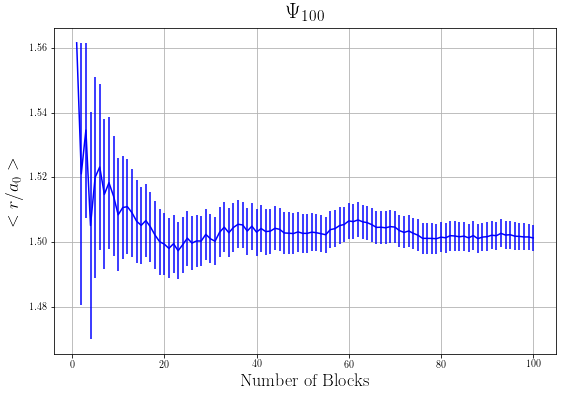

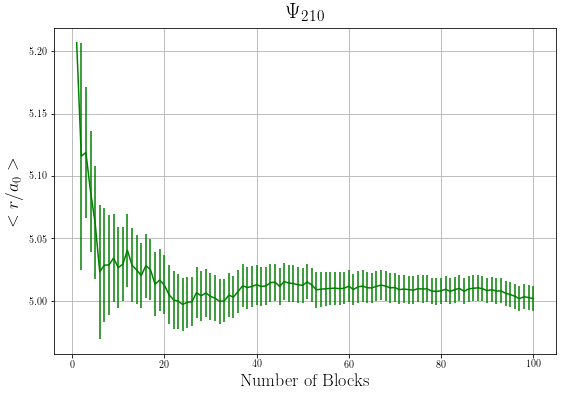

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)

r1, err1 = np.loadtxt("UniformSimulation/psi100.out", usecols = (0,1), delimiter=' ', unpack ='true')
r2, err2 = np.loadtxt("UniformSimulation/psi210.out", usecols = (0,1), delimiter=' ', unpack ='true')

x = np.arange(len(r1)) +1 

plt.figure(figsize=(9,6))
plt.errorbar(x, r1, yerr=err1, color='blue')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('$<r/a_0>$', fontsize=18)
plt.title('$\Psi_{100}$', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, r2, yerr=err2, color='green')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('$<r/a_0>$', fontsize=18)
plt.title('$\Psi_{210}$', fontsize=22)
plt.grid(True)

plt.show()

Per un ulteriore verifica del funzionaemnto dell'algoritmo di Metropolis vogliamo graficare un istogramma per contare quante posizioni della simulazione si trovino a una certa distanza dall'origine. Questo istogramma viene poi confrontato tramite un fit con la distribuzione della distanza dall'origine. Nei due casi questa distribuzione vale:

$$ 
\rho100(r) = r^2 |R_{10}(r)|^2 = r^2 e^{-2r}
$$

$$ 
\rho210(r) = r^2 |R_{21}(r)|^2 = r^4 e^{-r}
$$

La linea rossa nei seguenti Istogrammi rappresenta appunto il fit eseguito.

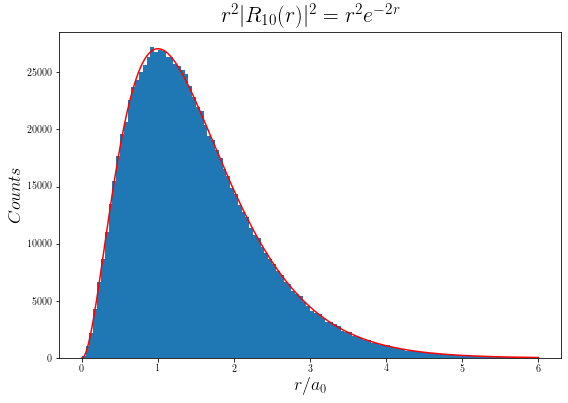

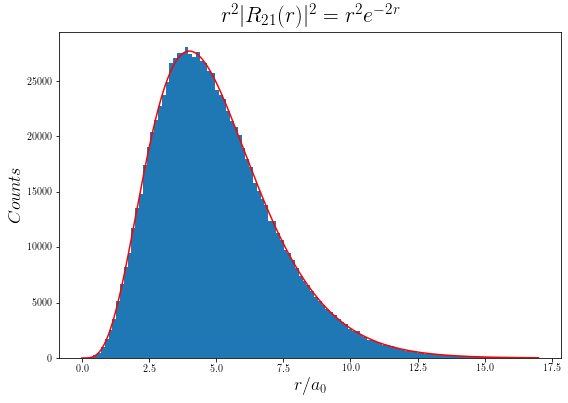

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

r1 = np.loadtxt("UniformSimulation/radius_100.out", usecols=(0), delimiter=' ', unpack='true')
r2 = np.loadtxt("UniformSimulation/radius_210.out", usecols=(0), delimiter=' ', unpack='true')

def f1(x,k):  # defining the fitting function for psi100
    return k * np.exp(-2*x) * x**2

def f2(x,k):  # defining the fitting function for psi210
    return k *  np.exp(-x) * x**4

## PSI100

plt.figure(figsize=(9,6))
n, bins, patches = plt.hist(r1, 120, range = (0.0,6.0))

bin_centers = bins[:-1] + np.diff(bins) / 2  # we want to fit the centers of the bins of the histogram
kopt, _ = curve_fit(f1, bin_centers, n, p0=[25000.]) # the strting value of the parameter is determined watching the hist
x_interval_for_fit = np.linspace(bins[0], bins[-1], 10000) 
plt.plot(x_interval_for_fit, f1(x_interval_for_fit, *kopt), color = 'r', label='fit')

plt.xlabel(r'$r/a_0$', fontsize=18)
plt.ylabel(r'$Counts$', fontsize=18)
plt.title(r'$r^2 |R_{10}(r)|^2 = r^2 e^{-2r}$', fontsize=22)

## PSI210

plt.figure(figsize=(9,6))
n, bins, patches = plt.hist(r2, 120, range = (0.0,17.0))

bin_centers = bins[:-1] + np.diff(bins) / 2
kopt, _ = curve_fit(f2, bin_centers, n, p0=[25000.])
x_interval_for_fit = np.linspace(bins[0], bins[-1], 10000)
plt.plot(x_interval_for_fit, f2(x_interval_for_fit, *kopt), color = 'r', label='fit')

plt.xlabel(r'$r/a_0$', fontsize=18)
plt.ylabel(r'$Counts$', fontsize=18)
plt.title(r'$r^2 |R_{21}(r)|^2 = r^2 e^{-2r}$', fontsize=22)


plt.show()

Di seguito sono riportate due visualizzazionni tridimensionali dei campionamenti nei due casi. Nel caso di $\Psi_{210}$ si nota proprio che per $\theta \simeq \pi/2$ ci sono pochi campioni e i punti si dividono in due parti.

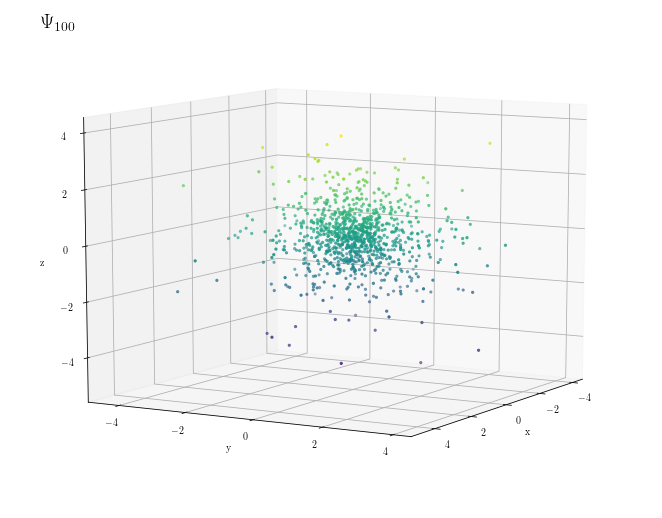

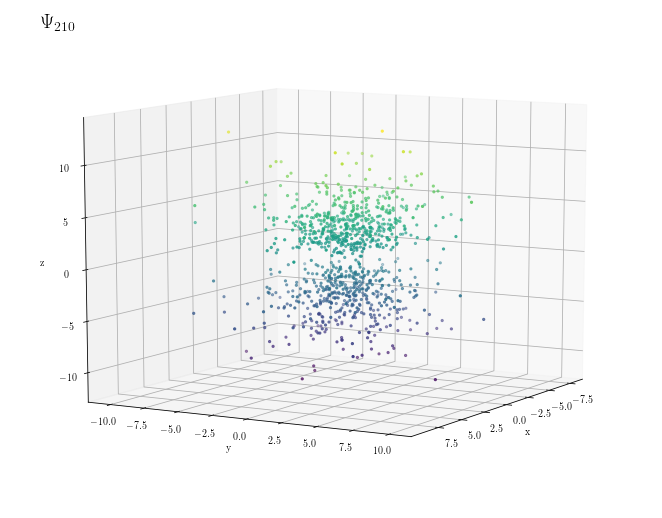

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

X1, Y1, Z1 = np.loadtxt('UniformSimulation/positions_100.out', usecols=(0, 1, 2), delimiter=' ', unpack='true')
X2, Y2, Z2 = np.loadtxt('UniformSimulation/positions_210.out', usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(9, 7))
ax = Axes3D(fig)
ax.scatter(X1, Y1, Z1, c=Z1, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.text2D(0.05, 0.95, r'$\Psi_{100}$', transform=ax.transAxes, fontsize=20)
ax.view_init(10, 30)

fig = plt.figure(figsize=(9, 7))
ax = Axes3D(fig)
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.text2D(0.05, 0.95, r'$\Psi_{210}$', transform=ax.transAxes, fontsize=20)
ax.view_init(10, 30)

plt.show()

Vogliamo inoltre verificare il fatto che il funzionamento dell'algoritmo di metropolis è iindipendente dalla scelta della probabilità di transizione (purchè sia una funzione abbastanza buona). Si esegue quindi nuovamente la simulazione prendendo come matrice di trasferimento $T(x|y)$ data da una distribuzione normale centrata in $y$.
Si esegue nuovamente la fase di queilibrazione iniziale, in particolare per trovare dei buoni valori per la deviazione standard della gaussiana in modo da avere sempre il $50%$ di accettazione.
Di seguito sono riportati i grafici come quelli sopra, che rappresentano l'andamento del valor medio del raggio e della relativa incertezza all'aumentare del numero di blocchi del *data blocking*.

[]

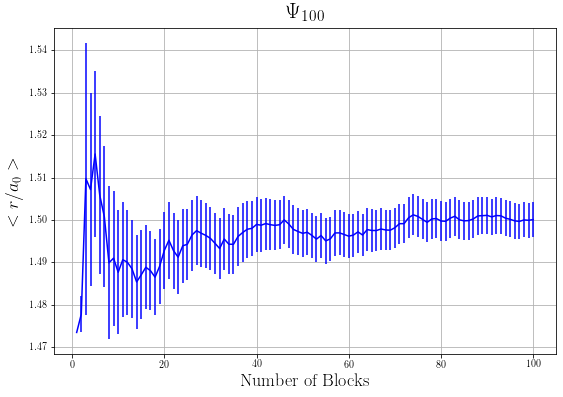

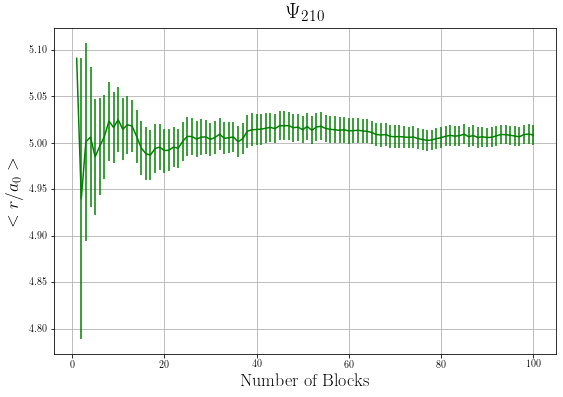

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)

r1, err1 = np.loadtxt("GaussianSimulation/psi100.out", usecols = (0,1), delimiter=' ', unpack ='true')
r2, err2 = np.loadtxt("GaussianSimulation/psi210.out", usecols = (0,1), delimiter=' ', unpack ='true')

x = np.arange(len(r1)) +1 

plt.figure(figsize=(9,6))
plt.errorbar(x, r1, yerr=err1, color='blue')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('$<r/a_0>$', fontsize=18)
plt.title('$\Psi_{100}$', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, r2, yerr=err2, color='green')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('$<r/a_0>$', fontsize=18)
plt.title('$\Psi_{210}$', fontsize=22)
plt.grid(True)

plt.plot()